In [ ]:
! pip install emoji

In [ ]:
! pip install --upgrade spacy
! python -m spacy download en_core_web_md

     |████████████████████████████████| 45.7 MB 60 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import json
import numpy
import re
import emoji

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt

import spacy
nlp = spacy.load('en_core_web_md')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords_nltk = stopwords.words('english')
print("nltk stopwords:", len(stopwords_nltk))
print(sorted(stopwords_nltk))

kept_stopwords = ['aren', "aren't", 't', 'but', 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'don', "don't",
                  'do', 'not', 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'no', 'wasn', "wasn't",
                  'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'be', 'will', 'have']

stopwords = [stopword for stopword in stopwords_nltk if stopword not in kept_stopwords]
print("\nkept:", len(stopwords))

nltk stopwords: 179
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shoul

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
% cd gdrive/MyDrive/Laborator - NLP/Proiect

Mounted at /content/gdrive
/content/gdrive/MyDrive/Laborator - NLP/Proiect


In [ ]:
with open("amazon_one_plus_reviews.json", "r") as f:
    all_reviews = json.load(f) # lista de dictionare

products = ['OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)',
            'Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)',
            'Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage) - Latest 8nm Snapdragon 720G & Alexa Hands-Free | 6 Months No Cost EMI']
reviews = []
for review in all_reviews:
  if review["product"] == products[0]:
    reviews.append(review)

# 'product': 'Apple iPhone XR (64GB) - Black' - foarte dezechilibrat
# unique reviews: 4693
# very_bad: 313
# bad: 87
# neutral: 149
# good: 672
# very good: 3472

#'product': 'OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)'
# unique reviews: 9067
# very_bad: 1181
# bad: 456
# neutral: 913
# good: 1959
# very good: 4558

#'product': 'Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)' - dezechilibrat
# unique reviews: 12914
# very_bad: 39
# bad: 1085
# neutral: 2404
# good: 4608
# very good: 4778

# 'product': 'Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage)
# reviews: 6692
# very_bad: 827
# bad: 209
# neutral: 486
# good: 1338
# very good: 3832


In [ ]:
print("number of reviews:", len(reviews))
print(reviews[0])

opinions = ["Very Bad", "Bad", "Neutral", "Good", "Very Good"]

labels = []
labels_fewer = []
texts = []

very_bad = 0
bad = 0
neutral = 0
good = 0
very_good = 0

for review in reviews:
  text = review['review_title'] + ' ' + review['review_text']
  if text not in texts:
    texts.append(text)
    stars = int(float(review['review_rating'][0:3]))
    labels.append(opinions[stars-1])
    if stars < 3: labels_fewer.append('bad')
    elif stars > 3: labels_fewer.append('good')
    else: labels_fewer.append('neutral')

    if stars == 1: very_bad += 1
    if stars == 2: bad += 1
    if stars == 3: neutral += 1
    if stars == 4: good += 1
    if stars == 5: very_good += 1

labels = numpy.array(labels)

print("unique reviews:", len(texts))
#print(len(labels))
print("very_bad:", very_bad)
print("bad:", bad)
print("neutral:", neutral)
print("good:", good)
print("very good:", very_good)

texts[0:15]

number of reviews: 9469
{'product': 'OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)', 'product_company': 'OnePlus', 'profile_name': 'Nikhil', 'review_title': '*Read before you buy!!*', 'review_rating': '5.0 out of 5 stars', 'review_text': '\n  Yea..pre-ordered on 28 July, got it on 4 August. Package was nice without any damage. So here is my first impression:', 'helpful_count': '721 people found this helpful', 'total_comments': 3, 'review_country': ' India ', 'reviewed_at': ' 4 August 2020', 'url': 'https://www.amazon.in/product-reviews/B08695ZSP6/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews', 'crawled_at': 1603020227000.0, '_id': '45ca015a-2e39-5650-a174-ba966dd1e51f', 'verified_purchase': 'Verified Purchase', 'color': ' Marble Blue', 'style_name': ' 8GB RAM + 128GB Storage', 'size_name': 'na', 'category': 'electronics', 'sub_category': 'mobiles', 'images': ['https://images-na.ssl-images-amazon.com/images/I/61ndxFHkwfL._SY88.jpg', 'https://images-na.s

['*Read before you buy!!* \n  Yea..pre-ordered on 28 July, got it on 4 August. Package was nice without any damage. So here is my first impression:',
 'Near to mid range  Perfection \n  Got it delivered yesterday , used for about 5-6 hours , to tell you this is my first mid ranger previously I was using s9 plus , before that s7 edge and iphones in stone age .',
 'Great price! \n  An amazing phone!',
 'Beast in OnePlus. \n  Brilliant..',
 "Changed to Nord from 6t \n  I was skeptical about changing from One plus 6t to Nord as 845 still have more processing power than 765 and 5G won't be available in India for next 2 years, Nord has gorilla glass 5, whereas OP6t had Gorilla glass 6.",
 'Auto call recorder not available \n  Where is call recording option\n',
 'OnePlus NORD detailed review. \n  So I pre ordered this phone on 28th of July and I got this on 3rd August.... Thank you Amazon for faster delivery ...',
 "Worth every penny & please don't buy Oppo Reno 4 \n  Hey Guys i won't go in S

In [ ]:
def preprocesare(text):
  text = emoji.replace_emoji(text, replace=' ') # elimina emoji-urile

  text = text.lower()
  text = re.sub(r'\Wwww\S+|\Whttp\S+', ' ', text) # elimina link-urile
  text = re.sub(r'[#@]\S+', ' ', text) # elimina hashtag-urile si mentiunile
  text = re.sub(r'\d+', ' ', text) # elimina numerele

  text = re.sub(r"\s[’']|[’']\s", ' ', text) # inlocuieste ’ si ' care nu sunt in interiorul cuvintelor cu spatiu
  text = re.sub(r"[’']", '', text) # inlocuieste ’ si ' care sunt in interiorul cuvintelor cu sirul vid
  text = re.sub(r"[^\w\s]", ' ', text) # elimina restul punctuatiei

  text = re.sub(r'\s+', ' ', text) # contractam spatiile
  text = re.sub(r'^\s', '', text)

  return text


def tokenizare(text):
  tokens = nlp(text)
  tokens_without_stopwords = [token for token in tokens if token.text not in stopwords]
  lemmas = [token.lemma_ for token in tokens_without_stopwords]
  return lemmas

In [ ]:
# testing ~ 1 minut
cleaned_texts = [preprocesare(text) for text in texts]
text_tokens = [tokenizare(text) for text in cleaned_texts]

n = 0
for tokens in text_tokens:
  n += len(tokens)

print('no. of tokens =', n)
print(text_tokens[0:10]), print('\n')

cleaned_texts[0:15]

no. of tokens = 115379
[['read', 'buy', 'yea', 'pre', 'order', 'july', 'get', 'august', 'package', 'nice', 'without', 'damage', 'first', 'impression'], ['near', 'mid', 'range', 'perfection', 'get', 'deliver', 'yesterday', 'use', 'hour', 'tell', 'first', 'mid', 'ranger', 'previously', 'use', 'plus', 'edge', 'iphone', 'stone', 'age'], ['great', 'price', 'amazing', 'phone'], ['beast', 'oneplus', 'brilliant'], ['change', 'nord', 't', 'skeptical', 'change', 'one', 'plus', 't', 'nord', 'still', 'have', 'processing', 'power', 'g', 'will', 'not', 'be', 'available', 'india', 'next', 'year', 'nord', 'gorilla', 'glass', 'whereas', 'op', 't', 'gorilla', 'glass'], ['auto', 'call', 'recorder', 'not', 'available', 'call', 'recording', 'option'], ['oneplus', 'nord', 'detail', 'review', 'pre', 'order', 'phone', 'th', 'july', 'get', 'rd', 'august', 'thank', 'amazon', 'fast', 'delivery'], ['worth', 'every', 'penny', 'please', 'do', 'not', 'buy', 'oppo', 'reno', 'hey', 'guy', 'will', 'not', 'go', 'specs',

['read before you buy yea pre ordered on july got it on august package was nice without any damage so here is my first impression ',
 'near to mid range perfection got it delivered yesterday used for about hours to tell you this is my first mid ranger previously i was using s plus before that s edge and iphones in stone age ',
 'great price an amazing phone ',
 'beast in oneplus brilliant ',
 'changed to nord from t i was skeptical about changing from one plus t to nord as still have more processing power than and g wont be available in india for next years nord has gorilla glass whereas op t had gorilla glass ',
 'auto call recorder not available where is call recording option ',
 'oneplus nord detailed review so i pre ordered this phone on th of july and i got this on rd august thank you amazon for faster delivery ',
 'worth every penny please dont buy oppo reno hey guys i wont go in specs details as you are not reading this to read the specs i got it on nd august and after more than

In [ ]:
#dureaza ~ 3 minute
cv = CountVectorizer(
    preprocessor = preprocesare,
    tokenizer = tokenizare,       
    token_pattern = None,
    binary = False,           
    # max_features = 800,   # primul experiment            
    # ngram_range=(1, 3) # construim un vocabular de unigrame, bigrame, trigrame
    max_features = 600,  # al doilea experiment - da rezultate mai proaste              
    ngram_range=(2, 3) 
    )

# metoda `fit` este folosita in acest caz pentru a determina vocabularul
cv.fit(texts)
# calculeaza reprezentarile textelor (feature vectors)
features = cv.transform(texts) # bag of words
feature_names = cv.get_feature_names_out() # cuvintele

print(features.shape)
print(feature_names[0])
print(features[0], '\n')

print(type(cv.vocabulary_))
print(sorted(list(cv.vocabulary_.keys())))

(9067, 600)
also good
  (0, 506)	1 

<class 'dict'>
['also good', 'also not', 'amazing phone', 'amazing product', 'auto call', 'auto call recording', 'automatic call', 'average battery', 'average camera', 'average phone', 'awesome camera', 'awesome good', 'awesome mobile', 'awesome phone', 'awesome product', 'back camera', 'backup not', 'backup not good', 'backup poor', 'bad battery', 'bad battery life', 'bad camera', 'bad camera quality', 'bad experience', 'bad mobile', 'bad phone', 'bad product', 'bad quality', 'balanced phone', 'battery back', 'battery backup', 'battery backup not', 'battery backup poor', 'battery bad', 'battery battery', 'battery camera', 'battery drain', 'battery drain fast', 'battery good', 'battery issue', 'battery life', 'battery life also', 'battery life average', 'battery life bad', 'battery life battery', 'battery life camera', 'battery life good', 'battery life not', 'battery life poor', 'battery not', 'battery not good', 'battery performance', 'battery poo

[('one plus', 1000), ('good phone', 815), ('battery life', 782), ('camera quality', 755), ('do not', 650), ('not good', 603), ('oneplus nord', 486), ('value money', 387), ('phone good', 357), ('plus nord', 349), ('good product', 346), ('one plus nord', 342), ('good but', 331), ('not buy', 264), ('battery backup', 257), ('battery drain', 246), ('do not buy', 245), ('camera not', 245), ('good camera', 233), ('nice phone', 233)]


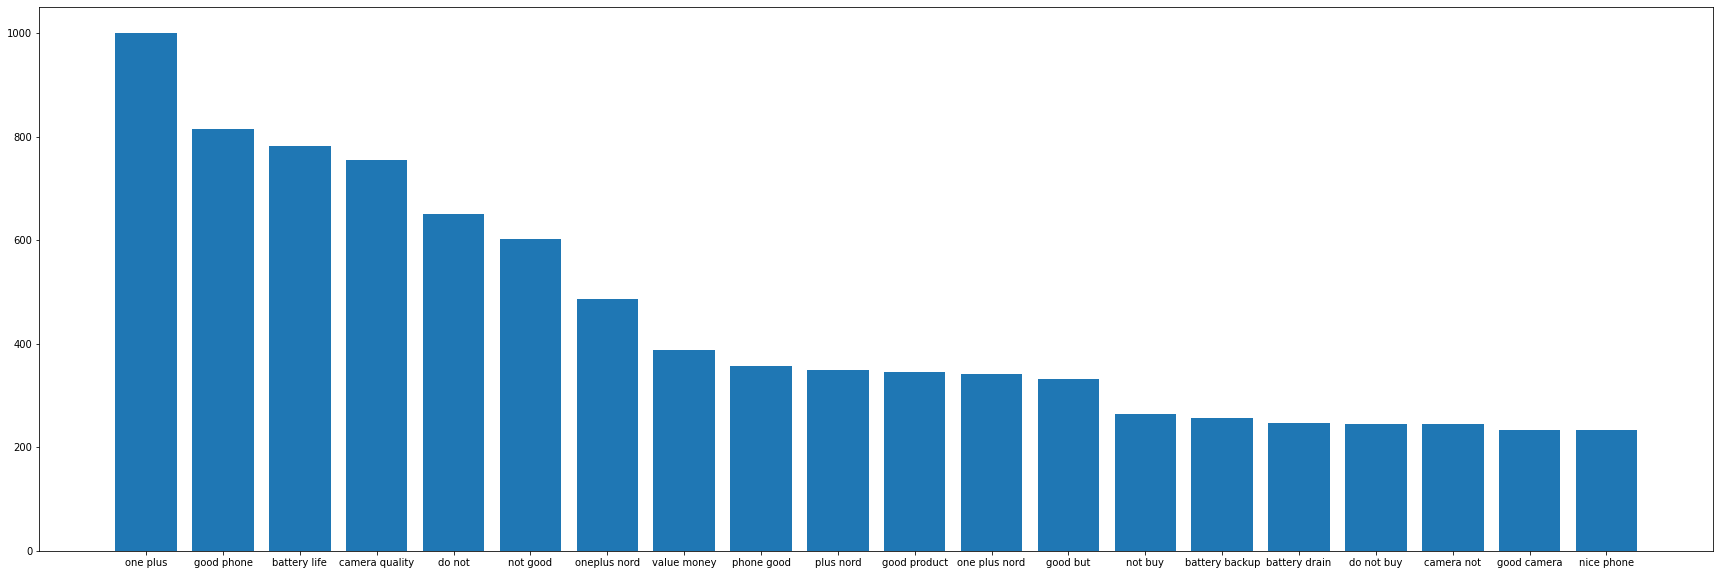

In [ ]:
import matplotlib.pyplot as plt

sum_words = features.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

#n = 30
n = 20
print(words_freq[0:n])

words = [item[0] for item in words_freq[0:n]]
freq = [item[1] for item in words_freq[0:n]]

plt.figure(figsize=(30, 10))
plt.bar(words, freq, orientation='vertical')
plt.show()

In [ ]:
data = features.toarray()

# clasa folosita pentru normalizare
scaler = preprocessing.Normalizer(norm='l2')

# scalam vectorii de train
scaled_data = scaler.transform(data)

train_data1, test_data1, train_labels1, test_labels1 = train_test_split(scaled_data, labels, test_size=0.2, random_state=55)
train_data_3labels, test_data_3labels, train_labels_3, test_labels_3 = train_test_split(scaled_data, labels_fewer, test_size=0.2, random_state=55)
train_data1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def evaluate(fitted_clf, test_data, true_labels):
  # folosim modelul pentru a prezice label-urile de test
  predict = fitted_clf.predict(test_data)
  accuracy = metrics.accuracy_score(true_labels, predict)
  f1_weighted = metrics.f1_score(true_labels, predict, average="weighted")
  print("Accuracy:", accuracy)
  print("Precision (macro):", metrics.precision_score(true_labels, predict, average="macro"))
  print("Precision (weighted):", metrics.precision_score(true_labels, predict, average="weighted"))
  print("Recall (macro):", metrics.recall_score(true_labels, predict, average="macro"))
  print("Recall (weighted):", metrics.recall_score(true_labels, predict, average="weighted"))
  print("F1 (macro):", metrics.f1_score(true_labels, predict, average="macro"))
  print("F1 (weighted):", f1_weighted), print("")
  return predict, accuracy, f1_weighted

Accuracy: 0.5363836824696803
Precision (macro): 0.3761405756580193
Precision (weighted): 0.5159204107786998
Recall (macro): 0.37109817412981294
Recall (weighted): 0.5363836824696803
F1 (macro): 0.3726215630319497
F1 (weighted): 0.5247812837115212

              precision    recall  f1-score   support

         Bad       0.16      0.14      0.15        84
        Good       0.30      0.25      0.27       382
     Neutral       0.24      0.22      0.23       171
    Very Bad       0.49      0.49      0.49       226
   Very Good       0.69      0.75      0.72       951

    accuracy                           0.54      1814
   macro avg       0.38      0.37      0.37      1814
weighted avg       0.52      0.54      0.52      1814

[[ 12   8  21  20  23]
 [ 17  95  37  31 202]
 [ 14  41  38  32  46]
 [ 19  17  28 110  52]
 [ 12 154  34  33 718]]


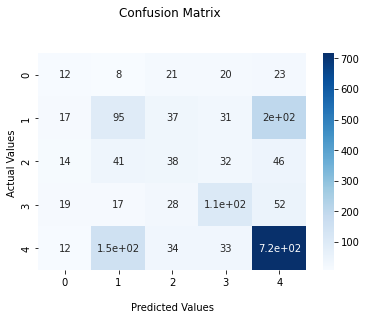

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10), activation='relu', solver='adam', alpha=0.01, batch_size='auto',
                     learning_rate='constant', learning_rate_init=0.01, n_iter_no_change=10, max_iter=300, tol=0.00001,
                     shuffle=True, random_state=10, warm_start=True)

# antrenam folosind datele de train
mlp1.fit(train_data1, train_labels1)
mlp1_predict, mlp1_accuracy, mlp1_f1_weighted = evaluate(mlp1, test_data1, test_labels1)

print(metrics.classification_report(test_labels1, mlp1_predict))
cm_mlp1 = metrics.confusion_matrix(test_labels1, mlp1_predict)
print(cm_mlp1) # <- matrice de confuzie
# Face confuzie mare intre Bad/Very Bad si Good/Very Good


ax = sns.heatmap(cm_mlp1, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()


# max_features = 800 + ngram_range=(1, 3) da urm. rezultate:
# Accuracy: 0.5452039691289967
# Precision (macro): 0.38657596002996125
# Precision (weighted): 0.544962461730354
# Recall (macro): 0.38603468725347934
# Recall (weighted): 0.5452039691289967
# F1 (macro): 0.38620236380929895
# F1 (weighted): 0.5450396383746503

Accuracy: 0.7668136714443219
Precision (macro): 0.560971920138308
Precision (weighted): 0.7579354322495696
Recall (macro): 0.5452668722736239
Recall (weighted): 0.7668136714443219
F1 (macro): 0.5524186098555521
F1 (weighted): 0.7619096525470916

              precision    recall  f1-score   support

         bad       0.58      0.52      0.55       310
        good       0.87      0.89      0.88      1333
     neutral       0.24      0.22      0.23       171

    accuracy                           0.77      1814
   macro avg       0.56      0.55      0.55      1814
weighted avg       0.76      0.77      0.76      1814

[[ 161  100   49]
 [  68 1192   73]
 [  49   84   38]]


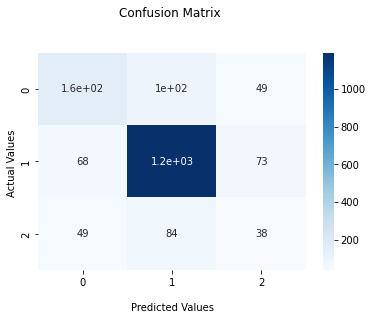

In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10), activation='relu', solver='adam', alpha=0.01, batch_size='auto',
                     learning_rate='constant', learning_rate_init=0.01, n_iter_no_change=10, max_iter=300, tol=0.00001,
                     shuffle=True, random_state=10, warm_start=True)

# antrenam folosind datele de train
mlp2.fit(train_data_3labels, train_labels_3)
mlp2_predict, mlp2_accuracy, mlp2_f1_weighted = evaluate(mlp2, test_data_3labels, test_labels_3)

print(metrics.classification_report(test_labels_3, mlp2_predict))
cm_mlp2 = metrics.confusion_matrix(test_labels_3, mlp2_predict)
print(cm_mlp2)

ax = sns.heatmap(cm_mlp2, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

# max_features = 800 + ngram_range=(1, 3) da urm. rezultate:
# Accuracy: 0.8020948180815877
# Precision (macro): 0.6265079648447874
# Precision (weighted): 0.8082544310021007
# Recall (macro): 0.6358864569943656
# Recall (weighted): 0.8020948180815877
# F1 (macro): 0.6309038717679664
# F1 (weighted): 0.8050485400902837

Accuracy: 0.593715545755237
Precision (macro): 0.370103746135661
Precision (weighted): 0.5189377698249006
Recall (macro): 0.3585139357801149
Recall (weighted): 0.593715545755237
F1 (macro): 0.35326170432665893
F1 (weighted): 0.5421171912485543

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        84
        Good       0.34      0.20      0.25       382
     Neutral       0.30      0.16      0.21       171
    Very Bad       0.54      0.54      0.54       226
   Very Good       0.67      0.90      0.77       951

    accuracy                           0.59      1814
   macro avg       0.37      0.36      0.35      1814
weighted avg       0.52      0.59      0.54      1814

[[  0  10  19  26  29]
 [  1  76  24  22 259]
 [  1  44  27  35  64]
 [  2  19  18 122  65]
 [  1  76   3  19 852]]


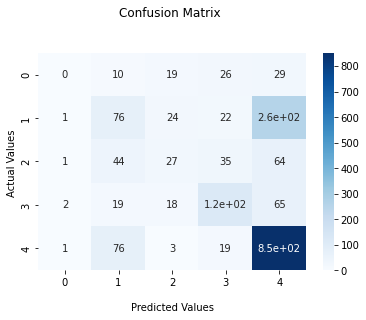

In [ ]:
svc1 = SVC(C=1, kernel='rbf', gamma='scale', tol=0.0001, class_weight=None, max_iter=-1, random_state=10)

# antrenam folosind datele de train
svc1.fit(train_data1, train_labels1)

svc1_predict, svc1_accuracy, svc1_f1_weighted = evaluate(svc1, test_data1, test_labels1)

print(metrics.classification_report(test_labels1, svc1_predict))
cm_svc1 = metrics.confusion_matrix(test_labels1, svc1_predict)
print(cm_svc1)
# Face confuzie mare intre Bad/Very Bad si Good/Very Good

ax = sns.heatmap(cm_svc1, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()


# max_features = 800 + ngram_range=(1, 3) da urm. rezultate:
# Accuracy: 0.6251378169790518
# Precision (macro): 0.4547753051351675
# Precision (weighted): 0.56945076576903
# Recall (macro): 0.41251872735761824
# Recall (weighted): 0.6251378169790518
# F1 (macro): 0.39472150299558
# F1 (weighted): 0.5795936026205682

Accuracy: 0.8004410143329658
Precision (macro): 0.5624632637507785
Precision (weighted): 0.7462982445045119
Recall (macro): 0.5135713752999654
Recall (weighted): 0.8004410143329658
F1 (macro): 0.5143198159083148
F1 (weighted): 0.7640403547174865

              precision    recall  f1-score   support

         bad       0.63      0.55      0.59       310
        good       0.84      0.96      0.90      1333
     neutral       0.21      0.04      0.06       171

    accuracy                           0.80      1814
   macro avg       0.56      0.51      0.51      1814
weighted avg       0.75      0.80      0.76      1814

[[ 170  128   12]
 [  47 1276   10]
 [  52  113    6]]


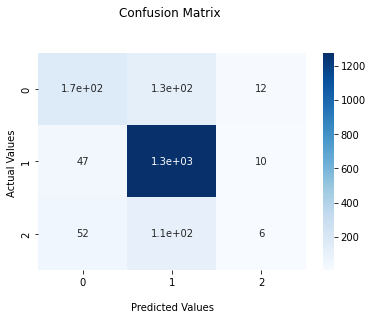

In [ ]:
svc2 = SVC(C=1.0, kernel='rbf', gamma='scale', tol=0.0001, class_weight=None, max_iter=-1, random_state=10)

# antrenam folosind datele de train
svc2.fit(train_data_3labels, train_labels_3)

svc2_predict, svc2_accuracy, svc2_f1_weighted = evaluate(svc2, test_data_3labels, test_labels_3)

print(metrics.classification_report(test_labels_3, svc2_predict))
cm_svc2 = metrics.confusion_matrix(test_labels_3, svc2_predict)
print(cm_svc2)


ax = sns.heatmap(cm_svc2, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

# max_features = 800 + ngram_range=(1, 3) da urm. rezultate:
# Accuracy: 0.8357221609702316
# Precision (macro): 0.6511216159999346
# Precision (weighted): 0.8025403752005661
# Recall (macro): 0.5860313031474242
# Recall (weighted): 0.8357221609702316
# F1 (macro): 0.579947105485788
# F1 (weighted): 0.8071727657692094